# Mathematical Underpinnings - Lab 1

## Task 1
### a) Generative approach 

We know $\pi = P(Y=1)$ and the distributions $f(x|Y=1)$ and $f(x|Y=-1)$.

#### First bullet point

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
# sampling from multivariate normal distribution and from Bernoulli

x = np.random.multivariate_normal(np.array([0,0]), np.eye(2), 5)
y = np.random.binomial(1, 0.5, 5)
x, y

(array([[-0.49756553,  0.75206311],
        [-0.28887627, -2.53996207],
        [ 0.43644118,  0.02665077],
        [ 0.25534248,  0.16812446],
        [-0.2280138 ,  0.83639988]]),
 array([0, 1, 1, 0, 0]))

In [3]:
m1 = np.array([1,1])
m2 = np.array([0,0])

sigma = np.array([[1, -0.5],[-0.5, 1]])

In [4]:
# sampling
Y_generative = np.array(([1] * 500) + [-1] * 500)
X1_generative = np.random.multivariate_normal(m1, sigma, 500)
X2_generative = np.random.multivariate_normal(m2, sigma, 500)
X_generative = np.concatenate((X1_generative, X2_generative))

Does the distribution of $P(Y=1|X=x)=p(y=1|x)$ correspond to a logistic model?

A hint: Use Bayes theorem to compute $p(y=1|x)$. Is it possible to represent $p(y=1|x)$ as $\frac{e^{\beta_0 + \beta x}}{1 + e^{\beta_0 + \beta x}}$?


#### Second bullet point

Find the formulas for the parameters of the logistic model (the coefficients and the intercept).

A hint: Use the representation of $p(y=1|x)$ from the first bullet point and solve for $\beta_0$ and $\beta$.

$P(Y=1|X) = \frac{exp(B_0 + B_x)}{1 + exp(B_0 + B_x)}$

In [5]:
# computing beta_0 and beta using the formulas

$\beta = \Sigma^{-1}(m_1 - m_2)$

In [6]:
# coefficient
np.linalg.inv(sigma) @ (m1 - m2)

array([2., 2.])

$\beta_0 = -\frac{1}{2}(m_1\Sigma^{-1}m_1 - m_2\Sigma^{-1}m_2)$

In [7]:
# intercept
-0.5 * (m1 @ np.linalg.inv(sigma) @ m1 - m2 @ np.linalg.inv(sigma) @ m2)

-2.0

In [8]:
# a logistic model
mod_a = LogisticRegression(penalty='none')
mod_a.fit(X_generative, Y_generative)
(mod_a.intercept_, mod_a.coef_)

(array([-2.05949354]), array([[2.26031472, 2.0400454 ]]))

### b) Discriminative approach

We know $f(x)$ and $P(Y=1|X=x)$.

#### First bullet point

In [9]:
np.expand_dims(np.array([1, 1, 0]), axis=1) * np.array([[1, 2], [1, 3], [1, 4]])

array([[1, 2],
       [1, 3],
       [0, 0]])

In [10]:
# sampling
B0 = -2
B = np.array([2, 2])
X_decision = np.random.binomial(1, 0.5, 1000)
X_disciminative = np.expand_dims(X_decision, axis=1) * np.random.multivariate_normal(m1, sigma, 1000) +\
                  np.expand_dims(np.abs(X_decision - 1), axis=1) * np.random.multivariate_normal(m2, sigma, 1000)
Y_discriminative = np.random.binomial(1, 1 / (1 + np.exp(-B0 - B @ X_disciminative.T)), 1000) * 2 - 1

In [11]:
mod_b = LogisticRegression(penalty='none')
mod_b.fit(X_disciminative, Y_discriminative)
(mod_b.intercept_, mod_b.coef_)

(array([-2.08583399]), array([[1.95217302, 2.01412572]]))

similiar enough

#### Second bullet point

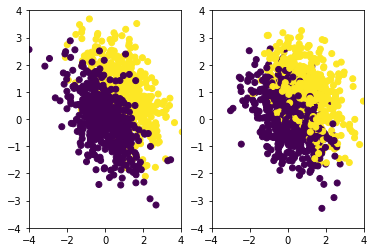

In [12]:
plt.subplot(1, 2, 1)
plt.scatter(X_generative[:, 0], X_generative[:, 1], c=Y_generative)
plt.ylim(-4,4)
plt.xlim(-4,4)
plt.subplot(1, 2, 2)
plt.scatter(X_disciminative[:, 0], X_disciminative[:, 1] , c=Y_discriminative)
plt.ylim(-4,4)
plt.xlim(-4,4)
plt.show()

What distinguishes the generative approach from the discriminative approach?

Generative: $P(X|Y=k)$ and $P(Y=k)$ is known

Discriminative: $P(X)$ and $P(Y=k|X)$ is known and $P(Y=k)$ can be estimated

### c)

To sample from $f_{X|Y=-1}$, first, we will give an answer to Q1.

Q1. A hint: use Bayes theorem for $p(x|y=-1)$ and use law of total probability for $p(x)$.

$exp(\lambda) = \lambda e^{-\lambda x}$

After solving the Bayes equation for $P(X|Y=-1)$ we get:

P(X|Y=-1) = $\frac{\pi}{1-\pi}e^{-\beta_0}e^{-(1+\beta_1)x}$

where 

$\frac{\pi}{1-\pi}e^{-\beta_0} = C_{\pi, \beta_0}$ which is our norming constant (a constant value that scales a distribution, so that the integral of the distribution equals to 1) for an $Exp(1 + \beta_1)$ distribution

given $\beta_1 = 1$ and $\pi = 1/3$ we can compute $\beta_0$ because $C_{\pi, \beta_0}$ = $1 + \beta_1$ = 2, giving us

$\beta_0 = -log(4)$

In [17]:
B0 = -np.log(4)
B0

-1.3862943611198906

In [57]:
n1 = 1000
x1 = np.random.exponential(1/1, n1)

n2 = 2000
x2 = np.random.exponential(1/2, n2)

y = np.array([1] * n1 + [0] * n2)
x = np.expand_dims(np.hstack((x1, x2)), axis=1)

In [58]:
# a model
mod = LogisticRegression(penalty='none')
mod.fit(x, y)

LogisticRegression(penalty='none')

In [59]:
mod.intercept_, mod.coef_

(array([-1.34660577]), array([[0.92376906]]))

The values from a fitted model seem to confirm the results of our computations.

Q2, Q3. A hint: what is the distribution of $f_{X|Y=-1}$? What ia a norming constant?

Answers above

If that is doable, given $\beta_1$ and $\pi$ compute $\beta_0$.

A hint: Of course it is, compute $\beta_0$.

Answer also above

## Task 2

### a)

$R(a,a^*) = \mathbb{E} \mathcal{L}(f(X), Y) = \mathbb{E}(aX - Y)^2 = ...$,

In our task we know $a^* = 1$.

In [268]:
# def population_risk(a, sigma_eps):
#     return ...

### b)

In [269]:
# sampling

Empirical risk: $\frac{1}{n} \sum_{i=1}^n (ax_i - y_i)^2$

In [270]:
# def empirical_risk(a, x, y):
#     return ...

### c)

In [37]:
# code, plot

### d)

Excess risk: $$E(\hat a, a^*) =R(\hat a, a^*) - \textrm{inf}_{a \in A_0} R(a, a^*)$$

In [38]:
# excess risk
# ...

In [39]:
# simulations with fixed sample size

In [276]:
# simulations for various sample sizes

In [40]:
# a nice plot visualising the results (how the unconditional excess risk changes with a sample size)